In [1]:
%matplotlib inline
import math

import numpy as np
import matplotlib.pyplot as plt

from linalg_helper import *

First, we'll simulate a system with 10 dimensions, 1 unstable eigenvalue and all others stable

Eigenvalues of matrix
1.08599302163133
0.59087900264151
0.18764309093848308
0.17024868216125366
0.08284176202931308
0.028508560932688123
0.021262885967296412
0.011386895908863168
0.0025732263978134585
0.003060050559880615

Actual states


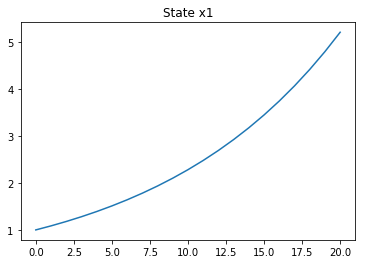

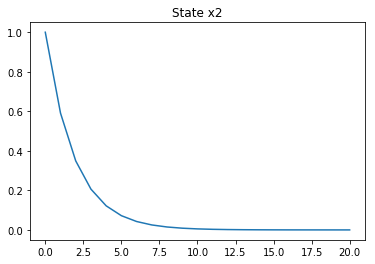

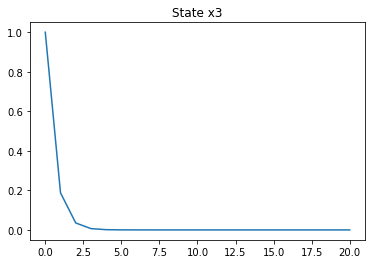

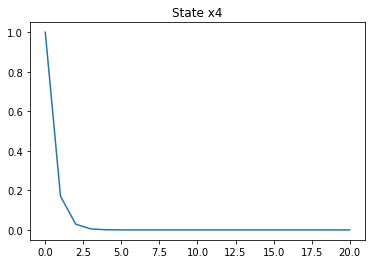

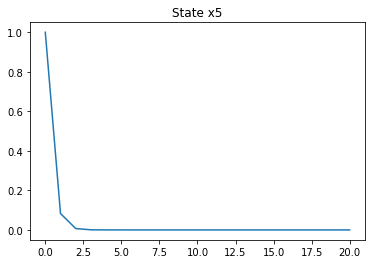

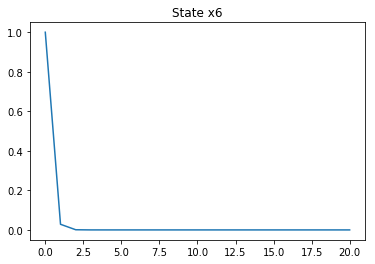

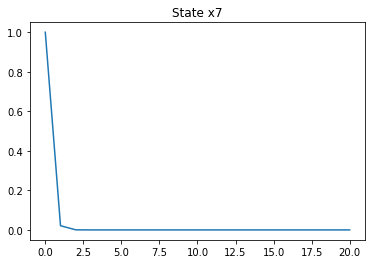

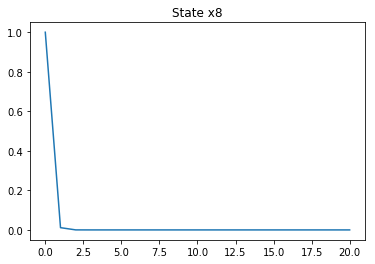

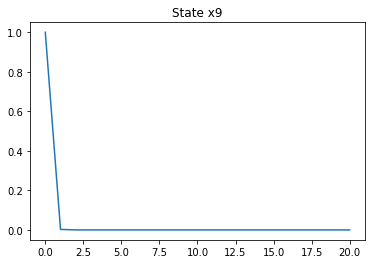

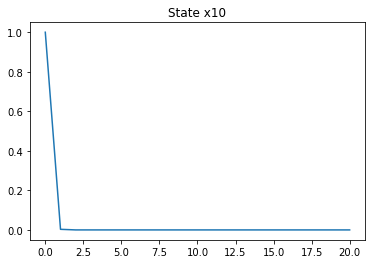

Observed through matrix


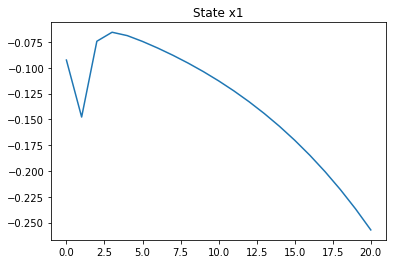

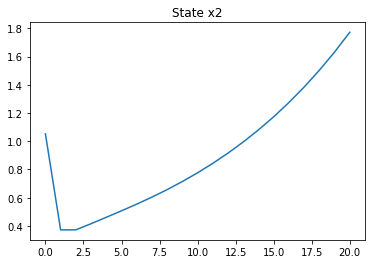

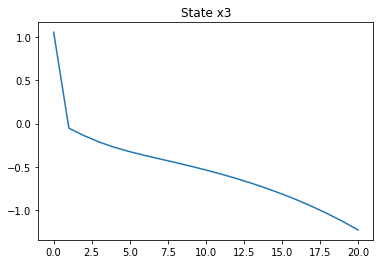

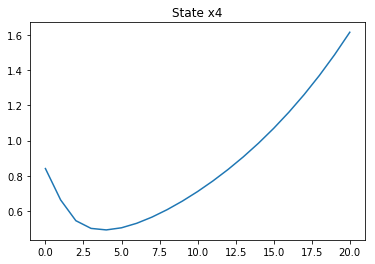

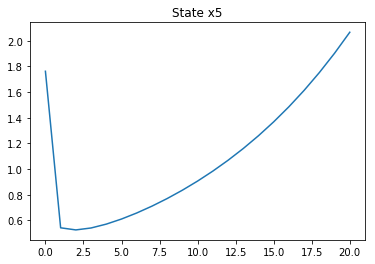

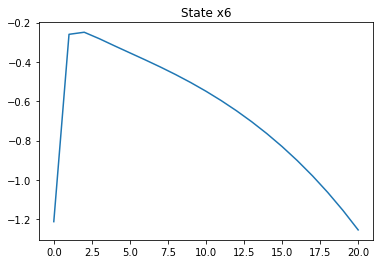

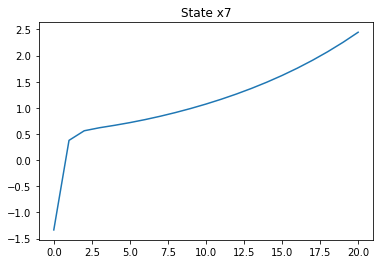

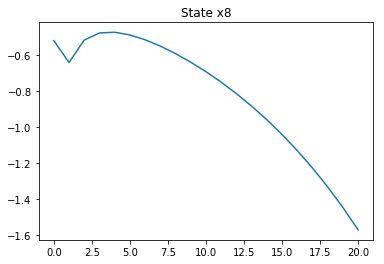

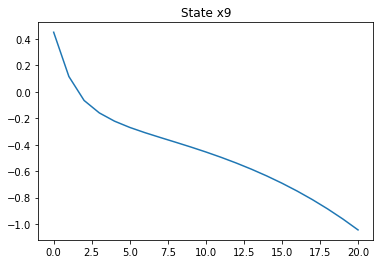

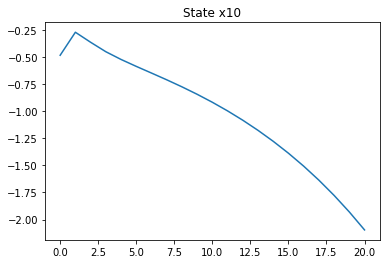

In [22]:
dim = 10
A = make_random_diagonal_matrix(dim, 1, 0.5, 1)
print('Eigenvalues of matrix')
for i in range(dim):
    print(A[i, i])
C = make_random_subspace(dim, dim)
x_init = np.ones(dim)
x = simulate_free_response(A, 20, x_init)
x_obs = (C.dot(x.T)).T
print('\nActual states')
plot_state_trace(x)
print('Observed through matrix')
plot_state_trace(x_obs)



Given random rotation of the state, all outputs will seem to diverge, or begin exhibiting the diverging eigenvalue. The probability distribution for this observation is unspecified. Next, we will examine if we get similar qualitative results/equivalency by simulating with random eigenvectors vs. some randomly rotated actuation vector

In [27]:
Q = make_random_subspace(dim, dim)

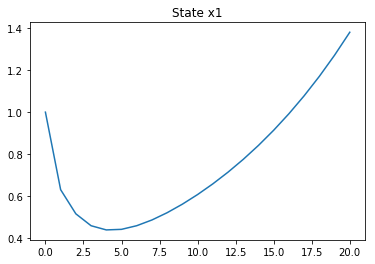

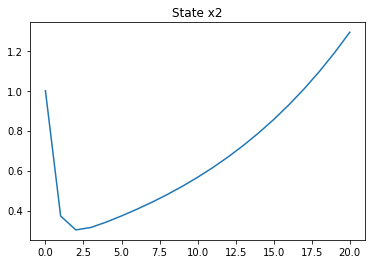

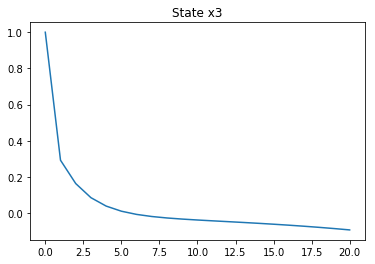

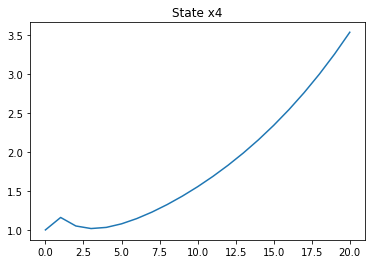

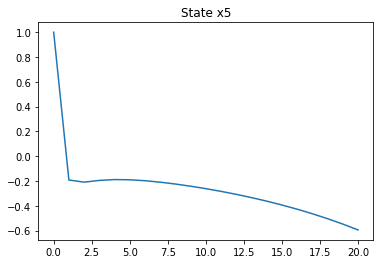

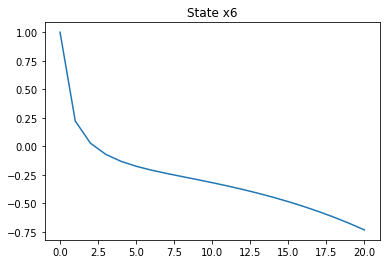

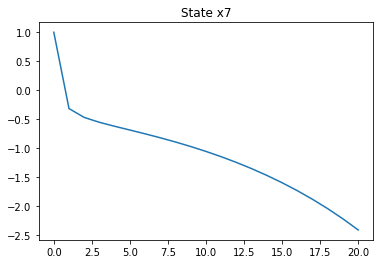

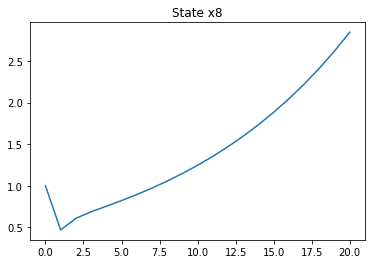

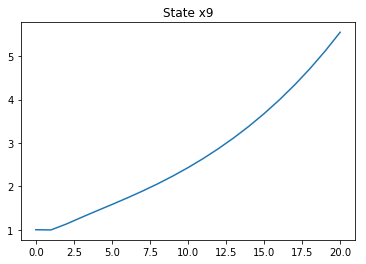

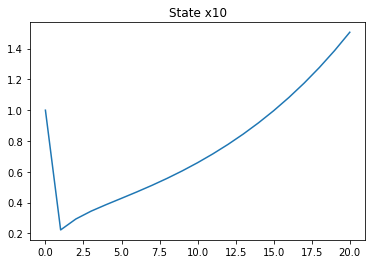

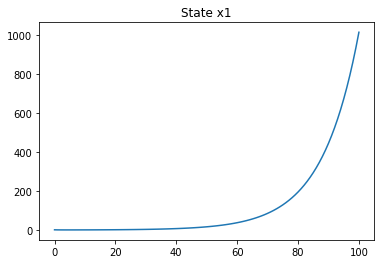

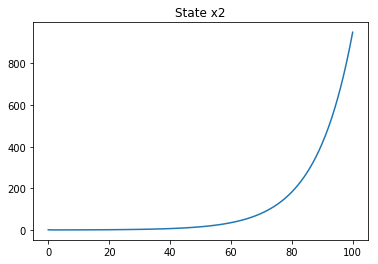

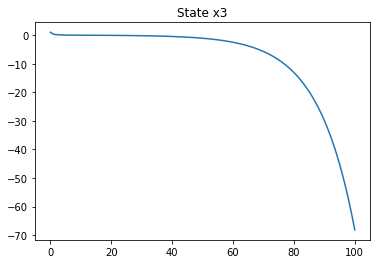

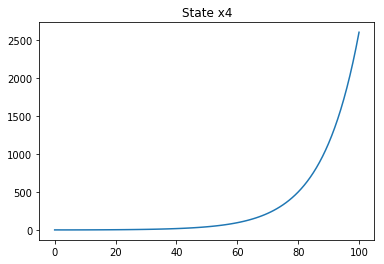

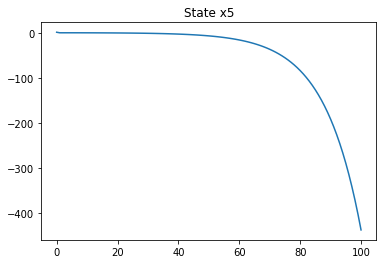

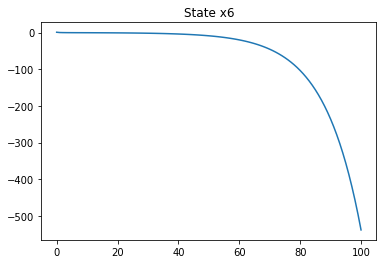

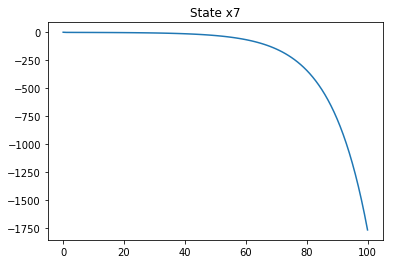

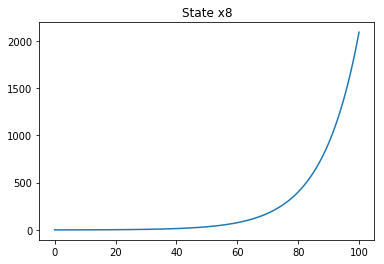

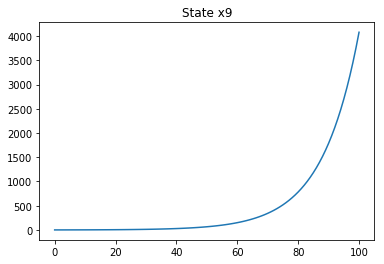

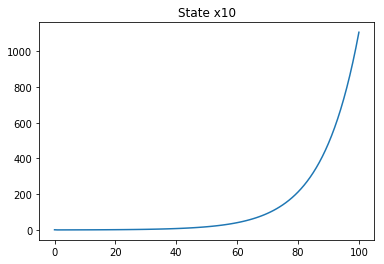

In [36]:
A_bar = Q @ A @ Q.T
x1 = simulate_free_response(A_bar, 20, x_init)
plot_state_trace(x1)
x2 = simulate_free_response(A_bar, 100, x_init)
plot_state_trace(x2)

Asymptotic behavior doesn't show up until after a while in the unstable system.

Having one coordinate transform in between our random observation direction of the state and just observing it in the diagonalized form doesn't seem all that different.

In [66]:
trials = 100
obs = np.zeros([101*trials, 10])

for i in range(101*trials):
    obs[i,:] = make_random_direction(dim).reshape([1, dim])

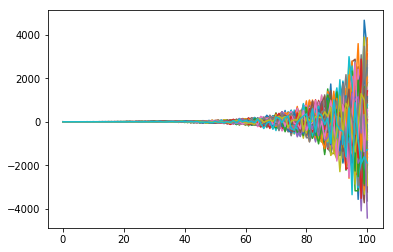

In [67]:
for i in range(trials):
    obs_curr = obs[101*i:101*i + 101, :]
    obs_vec = [(obs_curr @ x2.T)[i, i] for i in range(101)]
    plt.plot(range(101), obs_vec)

Is the envelope of our observations of interest??? There's something happening here, but maybe there's a really simple straightforward explanation. Maybe it's that since the largest state is the one blowing up, the observation vectors that give the maximal dot products on the fringe/envelope will be in greatest alignment with the blowing up?